<Axes: ylabel='60'>

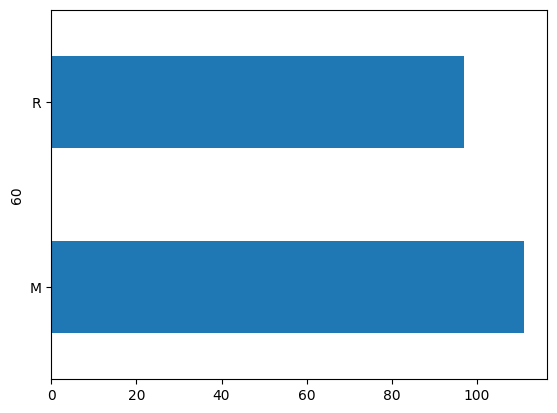

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import time

main_df = pd.read_csv('data/sonar/sonar.all-data.csv',header=None)

main_df[60].value_counts().plot(kind='barh')

In [2]:
y_df = main_df[60]
targes_label = {'M': 1,'R': 0}
targes_df = [targes_label[item] for item in y_df]
# print(targes_df)

inputs_df = main_df.drop(60, axis=1)

# x0 = np.ones((inputs_df.shape[0], 1))
# X = np.concatenate((x0, inputs_df), axis = 1)

X = inputs_df.values

# Imports from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB

# Use custom Perceptron model
from perceptron_model import perceptron_predict

X_train, X_test, y_train, y_test = train_test_split(X, targes_df, test_size=0.30,
random_state=42)

# Metrics and timing storage
results = {
    'model': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'time': []
}

# Time benchmarking for perceptron
start_time = time.time()
y_pred_perceptron = perceptron_predict(X_train, y_train, X_test)
end_time = time.time()

# Convert y_test to numpy array
y_test_np = np.array(y_test)

# Calculate metrics for Perceptron
accuracy_perceptron = accuracy_score(y_test_np, y_pred_perceptron)
precision_perceptron = precision_score(y_test_np, y_pred_perceptron)
recall_perceptron = recall_score(y_test_np, y_pred_perceptron)

# Store results
results['model'].append('Perceptron')
results['accuracy'].append(accuracy_perceptron)
results['precision'].append(precision_perceptron)
results['recall'].append(recall_perceptron)
results['time'].append(end_time - start_time)

# 2. Logistic Regression (sklearn)
log_reg = LogisticRegression(fit_intercept=True)

# Time benchmarking for Logistic Regression
start_time = time.time()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
end_time = time.time()

# Calculate metrics for Logistic Regression
accuracy_log_reg = accuracy_score(y_test_np, y_pred_log_reg)
precision_log_reg = precision_score(y_test_np, y_pred_log_reg)
recall_log_reg = recall_score(y_test_np, y_pred_log_reg)

# Store results
results['model'].append('Logistic Regression')
results['accuracy'].append(accuracy_log_reg)
results['precision'].append(precision_log_reg)
results['recall'].append(recall_log_reg)
results['time'].append(end_time - start_time)

# 3. Naive Bayes (GaussianNB)
naive_bayes = GaussianNB()

# Time benchmarking for Naive Bayes
start_time = time.time()
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)
end_time = time.time()

# Calculate metrics for Naive Bayes
accuracy_nb = accuracy_score(y_test_np, y_pred_nb)
precision_nb = precision_score(y_test_np, y_pred_nb)
recall_nb = recall_score(y_test_np, y_pred_nb)

# Store results
results['model'].append('Naive Bayes')
results['accuracy'].append(accuracy_nb)
results['precision'].append(precision_nb)
results['recall'].append(recall_nb)
results['time'].append(end_time - start_time)

# 4. Perceptron (sklearn)
pct = Perceptron(fit_intercept=True)

# Time benchmarking for Naive Bayes
start_time = time.time()
pct.fit(X_train, y_train)
y_pred_pct = pct.predict(X_test)
end_time = time.time()

# Calculate metrics for Naive Bayes
accuracy_pct = accuracy_score(y_test_np, y_pred_pct)
precision_pct = precision_score(y_test_np, y_pred_pct)
recall_pct = recall_score(y_test_np, y_pred_pct)

# Store results
results['model'].append('Perceptron (sklearn)')
results['accuracy'].append(accuracy_pct)
results['precision'].append(precision_pct)
results['recall'].append(recall_pct)
results['time'].append(end_time - start_time)

# Print the confusion matrices for all models
print('Confusion Matrix - Perceptron:')
print(confusion_matrix(y_test_np, y_pred_perceptron))

print('Confusion Matrix - Logistic Regression:')
print(confusion_matrix(y_test_np, y_pred_log_reg))

print('Confusion Matrix - Naive Bayes:')
print(confusion_matrix(y_test_np, y_pred_nb))

print('Confusion Matrix - Perceptron (sklearn):')
print(confusion_matrix(y_test_np, y_pred_pct))

Confusion Matrix - Perceptron:
[[20  8]
 [ 8 27]]
Confusion Matrix - Logistic Regression:
[[21  7]
 [ 5 30]]
Confusion Matrix - Naive Bayes:
[[26  2]
 [12 23]]
Confusion Matrix - Perceptron (sklearn):
[[16 12]
 [ 1 34]]


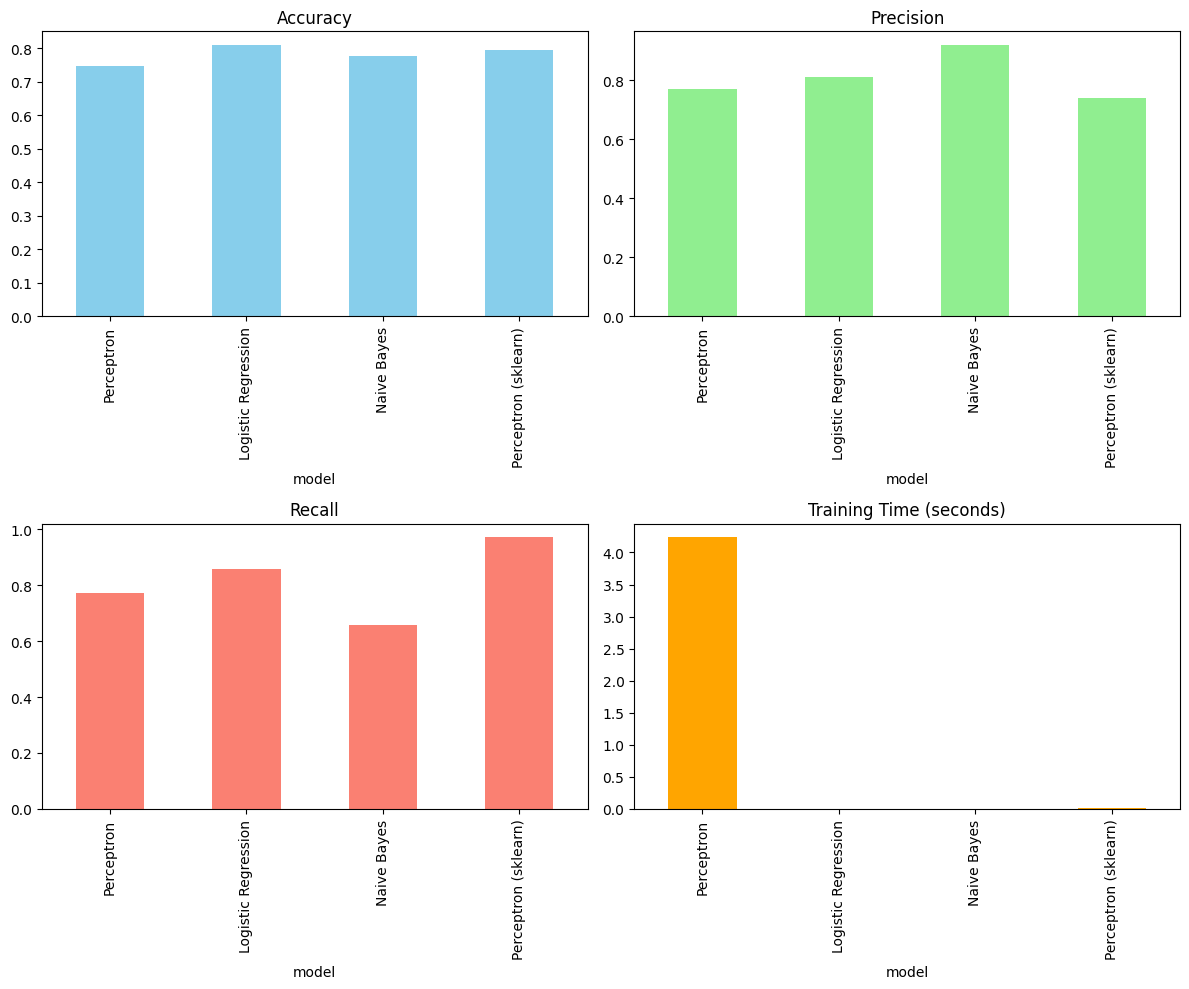

In [3]:
# Bar Plot Comparison
import pandas as pd

# Create a DataFrame to store and plot the results
df_results = pd.DataFrame(results)

# Plot bar charts for accuracy, precision, recall, and time
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot accuracy
df_results.plot(kind='bar', x='model', y='accuracy', ax=axes[0, 0], color='skyblue', legend=False)
axes[0, 0].set_title('Accuracy')

# Plot precision
df_results.plot(kind='bar', x='model', y='precision', ax=axes[0, 1], color='lightgreen', legend=False)
axes[0, 1].set_title('Precision')

# Plot recall
df_results.plot(kind='bar', x='model', y='recall', ax=axes[1, 0], color='salmon', legend=False)
axes[1, 0].set_title('Recall')

# Plot time
df_results.plot(kind='bar', x='model', y='time', ax=axes[1, 1], color='orange', legend=False)
axes[1, 1].set_title('Training Time (seconds)')

# Display the plot
plt.tight_layout()
plt.show()